In [2]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
#Keras and Tensorflow Imports
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [4]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,shear_range=0.3,horizontal_flip=True,brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

In [5]:
#Creating Batch size and Image shape, Resizing
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [6]:
#Defining Train, Test and Validation data
train_data=train_datagen.flow_from_directory("./dataset/train",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")
test_data=train_datagen.flow_from_directory("./dataset/test",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory("./dataset/validation",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

Found 4035 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 896 images belonging to 2 classes.


Text(0, 0.5, 'Total Images')

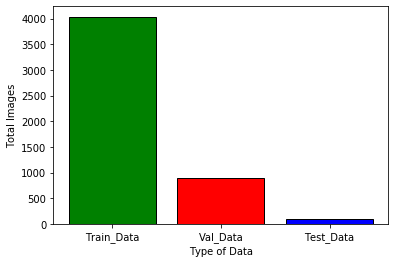

In [11]:
#Data Visualization
import pandas as pd
D1=pd.read_excel('book1.xlsx')
x = D1['Type of Data']
h = D1['Total Images']
plt.bar(x,h,color=['green','red','blue'],edgecolor='black')
plt.xlabel('Type of Data')
plt.ylabel('Total Images')

Text(0, 0.5, 'Total Images')

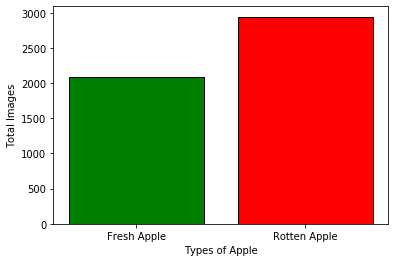

In [12]:
df=pd.read_csv('book1.csv')
x = df['Type of Data']
h = df['Total Images']
plt.bar(x,h,color=['green','red'],edgecolor='black')
plt.xlabel('Types of Apple')
plt.ylabel('Total Images')

In [99]:
train_data.class_indices

{'freshapples': 0, 'rottenapples': 1}

In [100]:
#Dictionary with key and correct values as labels
image_class_dict={0:'freshapples',1:'rottenapples'}

In [101]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])
        

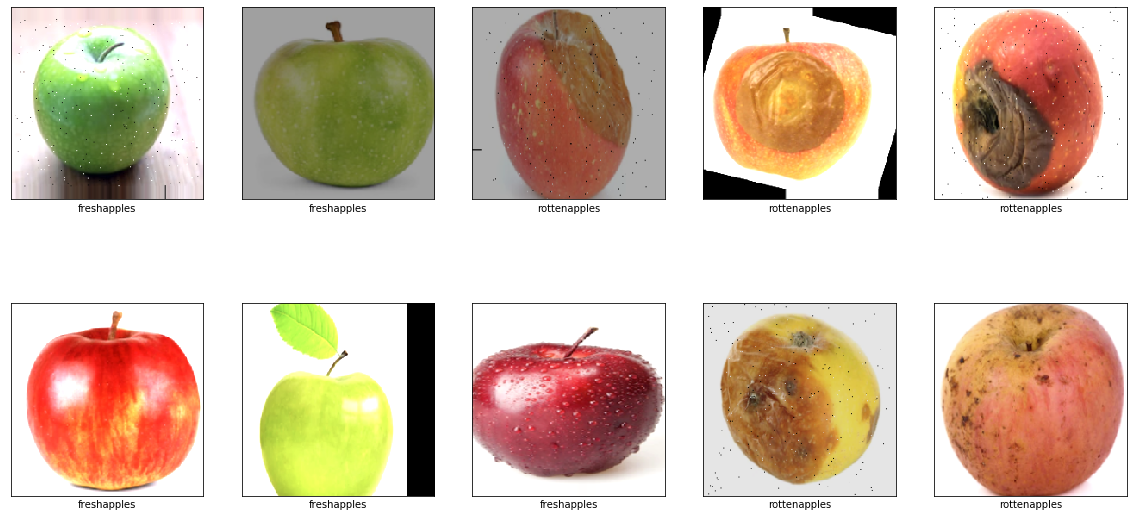

In [102]:
plot_random_images()

In [103]:
#Creating CNN model
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [104]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [105]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [106]:
#Training for 25 EPOCHS

In [107]:
history = cnn_model.fit_generator(train_data,validation_data=(val_data),epochs=25,steps_per_epoch=20,validation_steps=9)

Epoch 1/25
20/20 [==============================] - 13s 658ms/step - loss: 0.8715 - accuracy: 0.5813 - val_loss: 0.6668 - val_accuracy: 0.6042
Epoch 2/25
20/20 [==============================] - 13s 633ms/step - loss: 0.6446 - accuracy: 0.6031 - val_loss: 0.5761 - val_accuracy: 0.6771
Epoch 3/25
20/20 [==============================] - 13s 652ms/step - loss: 0.5140 - accuracy: 0.7594 - val_loss: 0.3216 - val_accuracy: 0.9028
Epoch 4/25
20/20 [==============================] - 13s 631ms/step - loss: 0.4112 - accuracy: 0.8469 - val_loss: 0.3401 - val_accuracy: 0.8889
Epoch 5/25
20/20 [==============================] - 13s 631ms/step - loss: 0.3848 - accuracy: 0.8453 - val_loss: 0.3192 - val_accuracy: 0.8993
Epoch 6/25
20/20 [==============================] - 13s 632ms/step - loss: 0.3386 - accuracy: 0.8625 - val_loss: 0.2600 - val_accuracy: 0.9062
Epoch 7/25
20/20 [==============================] - 12s 622ms/step - loss: 0.3483 - accuracy: 0.8703 - val_loss: 0.4114 - val_accuracy: 0.8160

In [108]:
#Evaluating Model
cnn_model.evaluate(val_data)

28/28 [==============================] - 9s 319ms/step - loss: 0.1530 - accuracy: 0.9386


[0.15301713347434998, 0.9386160969734192]

Text(0.5, 0, 'Epochs')

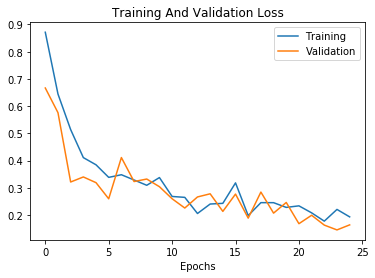

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [110]:
#Saving Model
cnn_model.save("Fruit_Classifier_model.h5")

In [7]:
#Loading Saved Model (START FROM HERE)
from keras.models import load_model
new_model = load_model("Fruit_Classifier_model.h5")
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [8]:
new_model.get_weights()

[array([[[[ 0.1167383 ,  0.1198181 ,  0.03388982,  0.02292456,
            0.15222111,  0.05063366,  0.00162108,  0.00249254,
            0.0388003 , -0.05298201,  0.11754303, -0.04320588,
           -0.17626914,  0.18231909,  0.14582913,  0.14677685],
          [-0.00969237, -0.01293568,  0.18792124,  0.19101173,
           -0.12151012, -0.01954434, -0.16499512, -0.18480134,
           -0.15572195,  0.12840022,  0.1690613 ,  0.17740536,
           -0.25441897, -0.06835951,  0.0835085 ,  0.14257161],
          [ 0.14343832, -0.04669437,  0.2194447 ,  0.07361923,
            0.01992399,  0.08332825, -0.15397033, -0.0273676 ,
           -0.16954663,  0.152479  , -0.09634503, -0.0330199 ,
            0.01909283, -0.17481986,  0.13621722,  0.04121457]],
 
         [[-0.09969644,  0.10652073, -0.17002346,  0.16133432,
            0.11013152,  0.17502241,  0.06030152, -0.00432479,
            0.11057882,  0.1574525 , -0.11497787,  0.15118708,
           -0.14829363,  0.04774356,  0.05572174,

In [9]:
new_model.optimizer

In [160]:
#Plotting graph for model training and validation performance
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.legend(['Training','Validation'])
#plt.title("Training And Validation Loss")
#plt.xlabel("Epochs")

SyntaxError: invalid syntax (<ipython-input-160-efa299394df3>, line 1)

In [17]:
#Testing Classification of Apple Image. 0 = Fresh Apple, 1 = Rotten Apple
from keras.preprocessing import image
test_image = image.load_img("./dataset/test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.25.54 PM.png", target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#result = cnn_model.predict(test_image)
result = new_model.predict(test_image)
print("The test_image is classified as",result[0])
print("The key and value associated are: 0=Fresh Apple, 1=Rotten Apple")

The test_image is classified as [0.]
The key and value associated are: 0=Fresh Apple, 1=Rotten Apple


In [18]:
from keras.preprocessing import image
test_image = image.load_img('./dataset/test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.07.05 PM.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#result = cnn_model.predict(test_image)
result = new_model.predict(test_image)
print("The test_image is classified as",result[0])
print("The key and value associated are: 0=Fresh, 1=Rotten")

The test_image is classified as [0.]
The key and value associated are: 0=Fresh, 1=Rotten


In [19]:
from keras.preprocessing import image
test_image = image.load_img('./dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.16.41 PM.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#result = cnn_model.predict(test_image)
result = new_model.predict(test_image)
print("The test_image is classified as",result[0])
print("The key and value associated are: 0=Fresh, 1=Rotten")

The test_image is classified as [1.]
The key and value associated are: 0=Fresh, 1=Rotten


In [20]:
from keras.preprocessing import image
test_image = image.load_img('./dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.57.26 PM.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#result = cnn_model.predict(test_image)
result = new_model.predict(test_image)
print("The test_image is classified as",result[0])
print("The key and value associated are: 0=Fresh, 1=Rotten")

The test_image is classified as [1.]
The key and value associated are: 0=Fresh, 1=Rotten


In [23]:
from sklearn.metrics import classification_report
from sklearn import metrics


test_set = test_datagen.flow_from_directory('./dataset/test',
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          class_mode = 'binary',
                                          shuffle=False )
predictions = new_model.predict_generator(
    test_set,
    steps = np.math.ceil(test_set.samples / test_set.batch_size),
    )
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes

class_labels = list(test_set.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

Found 100 images belonging to 2 classes.
              precision    recall  f1-score   support

 freshapples       0.50      1.00      0.67        50
rottenapples       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100

